In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np
import multiprocessing as mp
from geopandas_functions import *
import geodatasets

ModuleNotFoundError: No module named 'geopandas'

In [10]:
df_world

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.7562,..."
124,Land,0,0.0,"POLYGON ((-87.02 79.66, -85.81435 79.3369, -87..."
125,Land,0,0.0,"POLYGON ((-68.5 83.10632, -65.82735 83.02801, ..."


In [11]:
# df_world = gpd.read_file(geodatasets.data.naturalearth.land.url)
# df_antarctica = df_world[df_world['name'] == 'Antarctica']
df_world = gpd.read_file('/home/viktor/Pictures/map_game/custom.geo.json')
df_world

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
0,Admin-0 country,0,4,Belarus,BLR,0,2,Sovereign country,1,Belarus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLR.geojson,"POLYGON ((23.60624 51.5174, 23.60231 51.53078,..."
1,Admin-0 country,0,5,Lithuania,LTU,0,2,Sovereign country,1,Lithuania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LTU.geojson,"MULTIPOLYGON (((26.59453 55.66699, 26.60383 55..."
2,Admin-0 country,0,5,Czechia,CZE,0,2,Sovereign country,1,Czechia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CZE.geojson,"POLYGON ((14.81039 50.85845, 14.83168 50.85798..."
3,Admin-0 country,0,2,Germany,DEU,0,2,Sovereign country,1,Germany,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEU.geojson,"MULTIPOLYGON (((13.81572 48.76643, 13.78586 48..."
4,Admin-0 country,0,6,Estonia,EST,0,2,Sovereign country,1,Estonia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EST.geojson,"MULTIPOLYGON (((24.30616 57.86819, 24.31666 57..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Admin-0 country,1,4,Jamaica,JAM,0,2,Sovereign country,1,Jamaica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JAM.geojson,"POLYGON ((-76.26374 18.01236, -76.25678 17.996..."
244,Admin-0 country,3,5,United Kingdom,GB1,1,2,Dependency,1,Cayman Islands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CYM.geojson,"MULTIPOLYGON (((-81.1361 19.35489, -81.11754 1..."
245,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,serranillabank.geojson,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."
246,Admin-0 country,5,6,United Kingdom,GB1,1,2,Dependency,1,Bermuda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMU.geojson,"MULTIPOLYGON (((-64.6761 32.38866, -64.64763 3..."


In [12]:
df_world = df_world.append(df_antarctica).reset_index(drop=True)

AttributeError: 'GeoDataFrame' object has no attribute 'append'

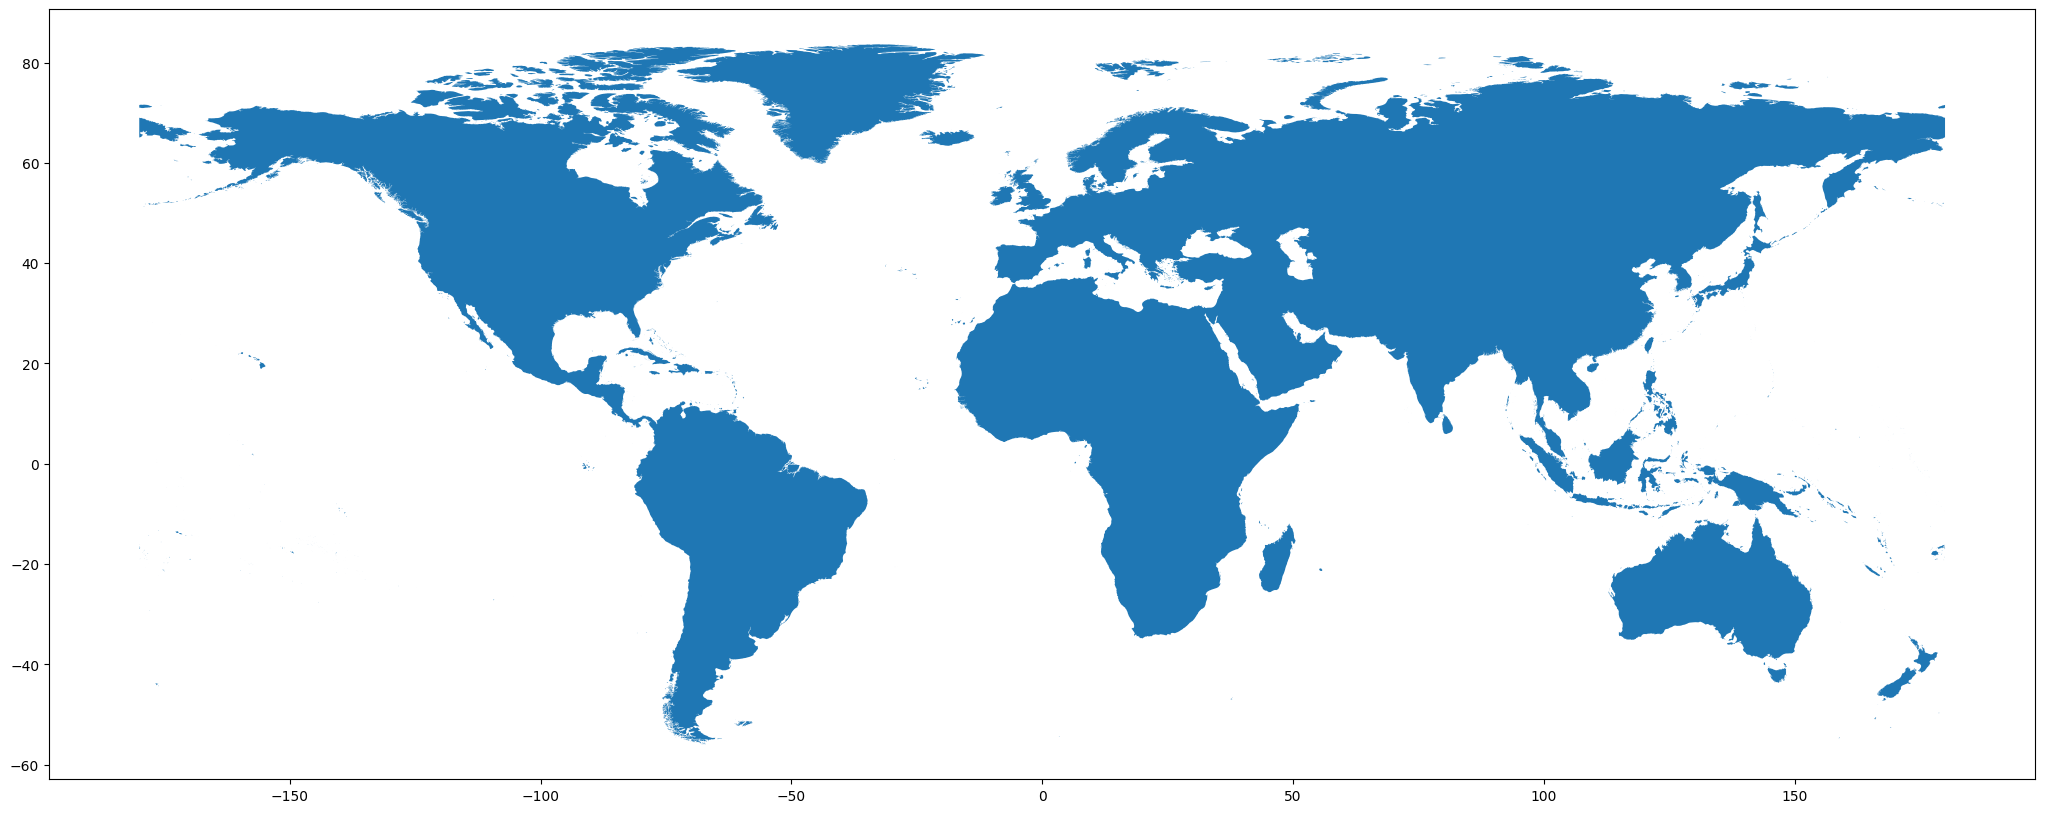

In [13]:
whole_world = df_world.loc[0, 'geometry'].union(df_world.loc[0, 'geometry'])
for i, row in df_world.iloc[1:].iterrows():
    whole_world = whole_world.union(row['geometry'])

df_whole_world = gpd.GeoDataFrame([0], geometry=[whole_world])
map_obj = df_whole_world.loc[0, 'geometry']
ax = df_whole_world.plot(figsize=(30,10))

In [6]:
# Generation loop
dir = '/home/viktor/Pictures/map_game'

points = [
    # (-90, 0),
    (0, 0),
    # (0, 90),
    # (90, 0),
    # (180, 0),
    # (15, 35),
    # (20, 57),
    # (112, 10),
    (-175, -75),
    # (61, 23)
]

def process_dict(kwargs):
    return process(**kwargs)

def process(long, lat):
    print(long, lat)
    if not point_in_ocean(lat, long, map_obj):
        print(f'Point not in ocean: {lat}, {long}')
        return
    intersections = get_all_intersections_dynamic(lat, long, map_obj, max_distance=0.1, max_iterations=8)

    save_all_plots(intersections, map_obj, lat, long, dir)

inputs = [{'long': point[0], 'lat': point[1]} for point in points]
pool = mp.Pool(processes=int(mp.cpu_count() / 8))
for _ in pool.imap(process_dict, inputs):
    pass


-1750 -75 


0


In [48]:
from importlib import reload
import geopandas_functions
reload(geopandas_functions)
find_closest_intersections = geopandas_functions.find_closest_intersections
plot_with_map = geopandas_functions.plot_with_map
get_vertical_circle = geopandas_functions.get_vertical_circle

LINESTRING (19.999999999999993 58.000000000000014, 14.846857362437676 59.41211035939155) [58.         59.41211036] [20.         14.84685736]


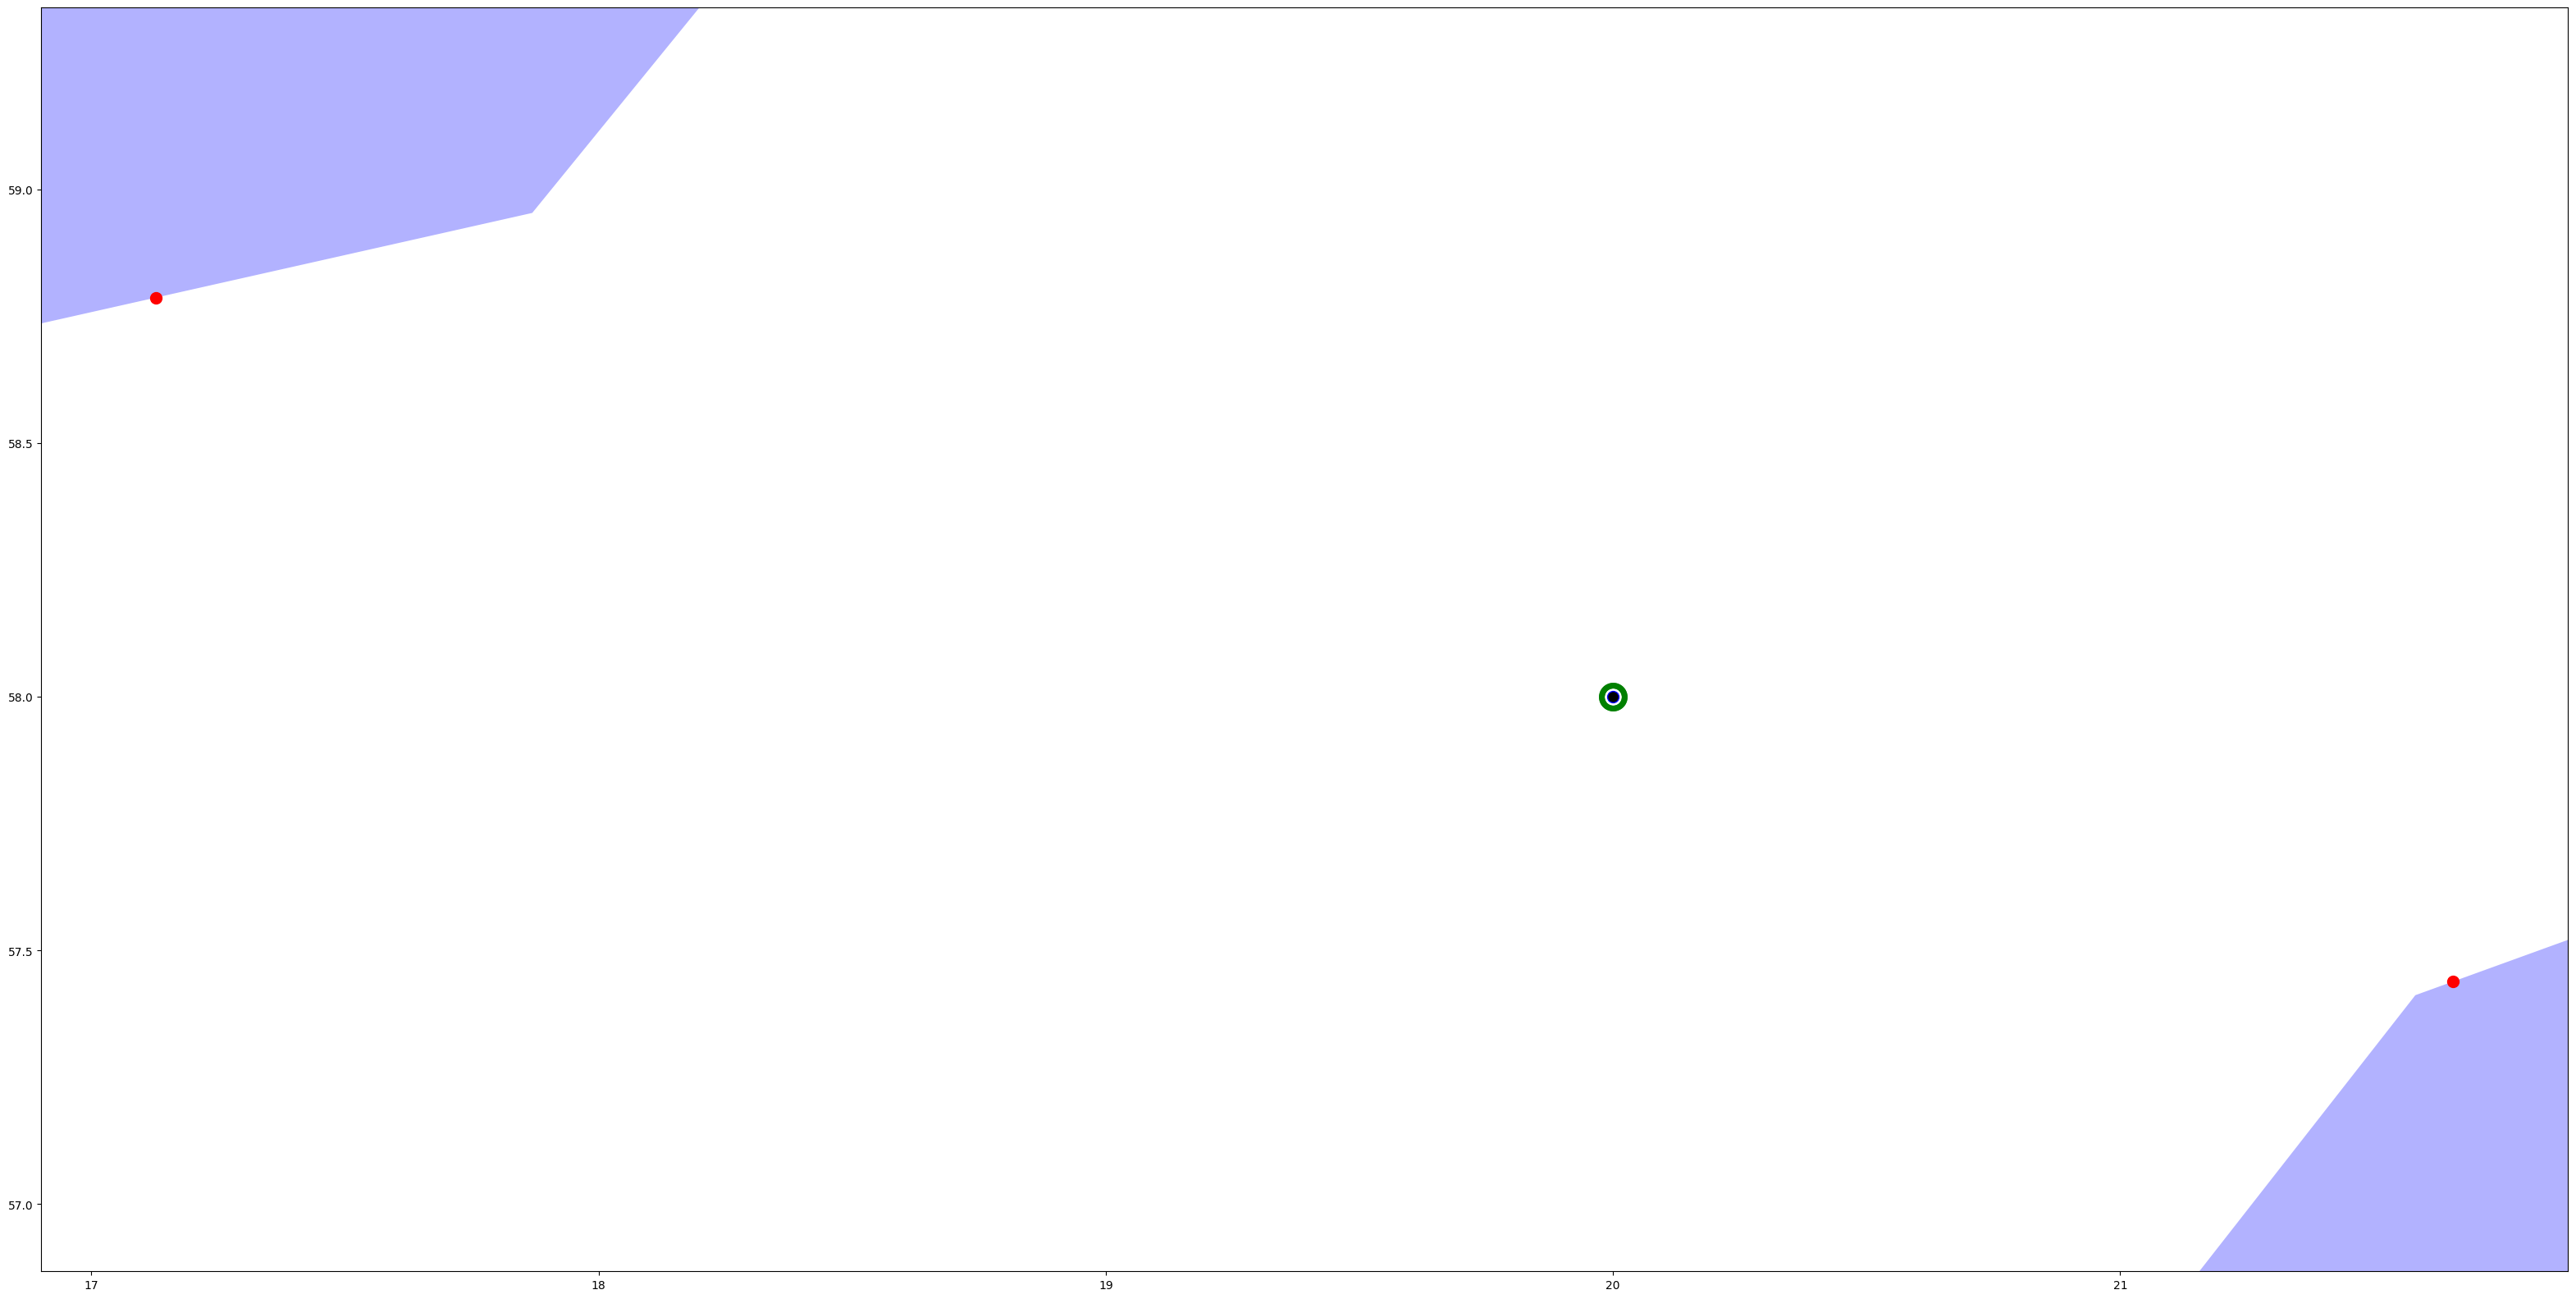

In [49]:
circle = get_great_circle(lat, long, 60)
inters = find_closest_intersections(circle[0], circle[1], map_obj)
inters = np.array(inters)

xlim, ylim = create_silhouette_plot(inters)
plt.close()
plot_with_map(map_obj, lat, long, inters, xlim, ylim);
plt.gca().plot(circle[1], circle[0], 'go', markersize=20, markerfacecolor="None", markeredgewidth=5)

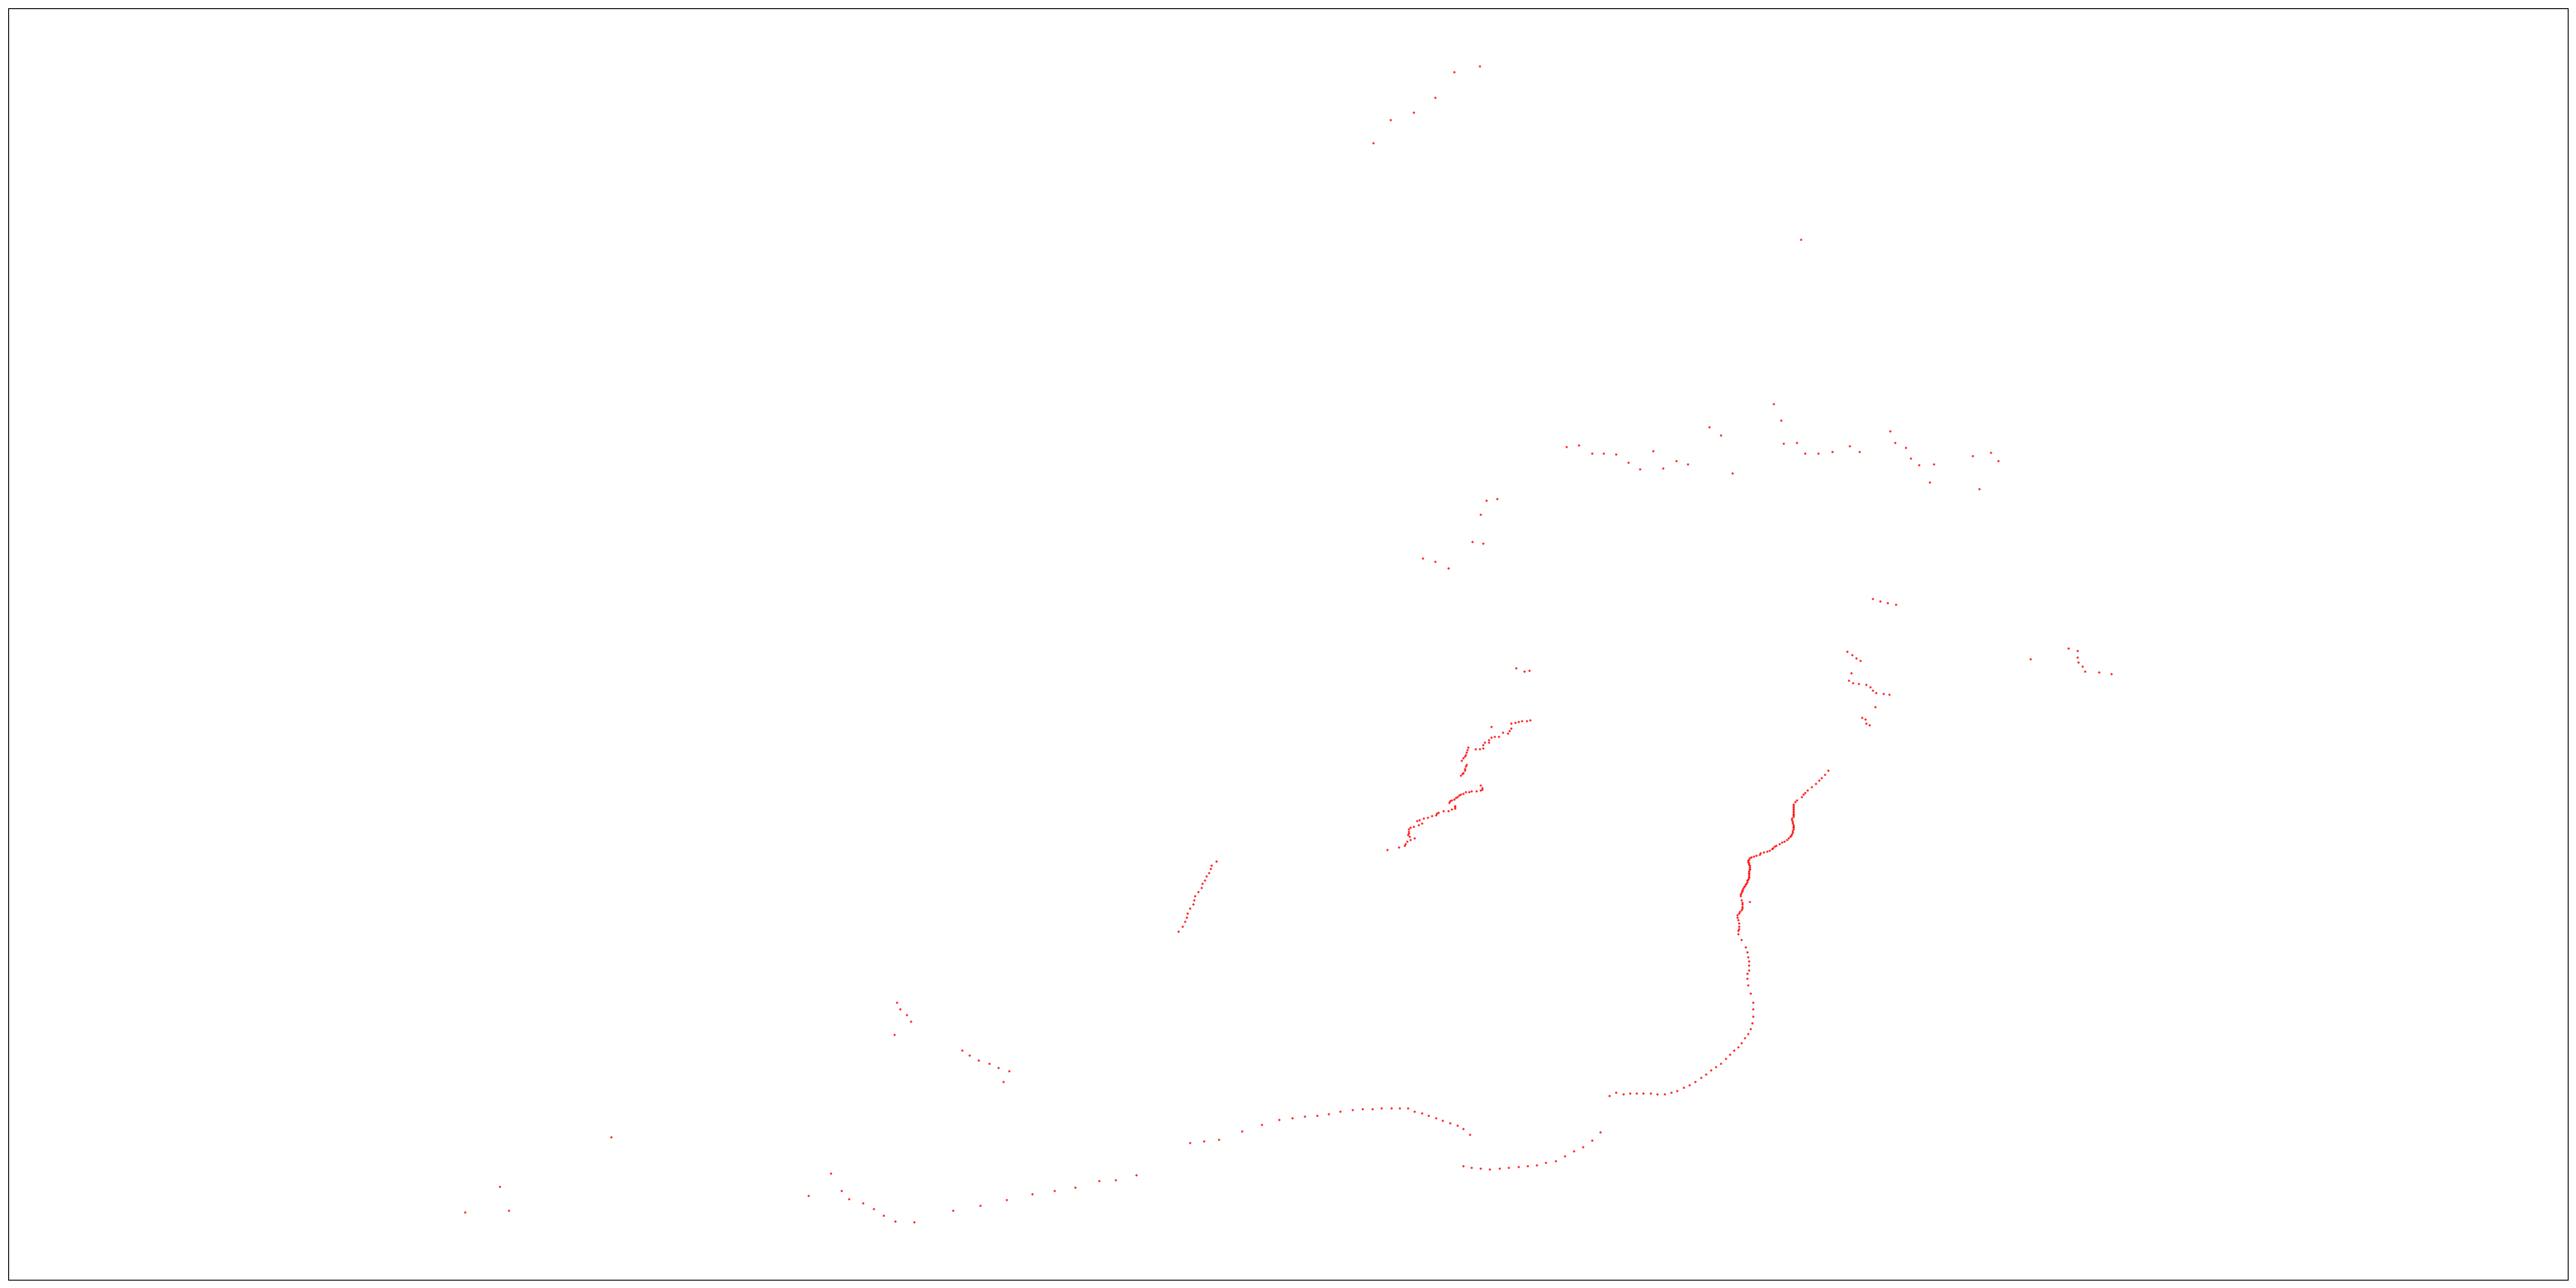

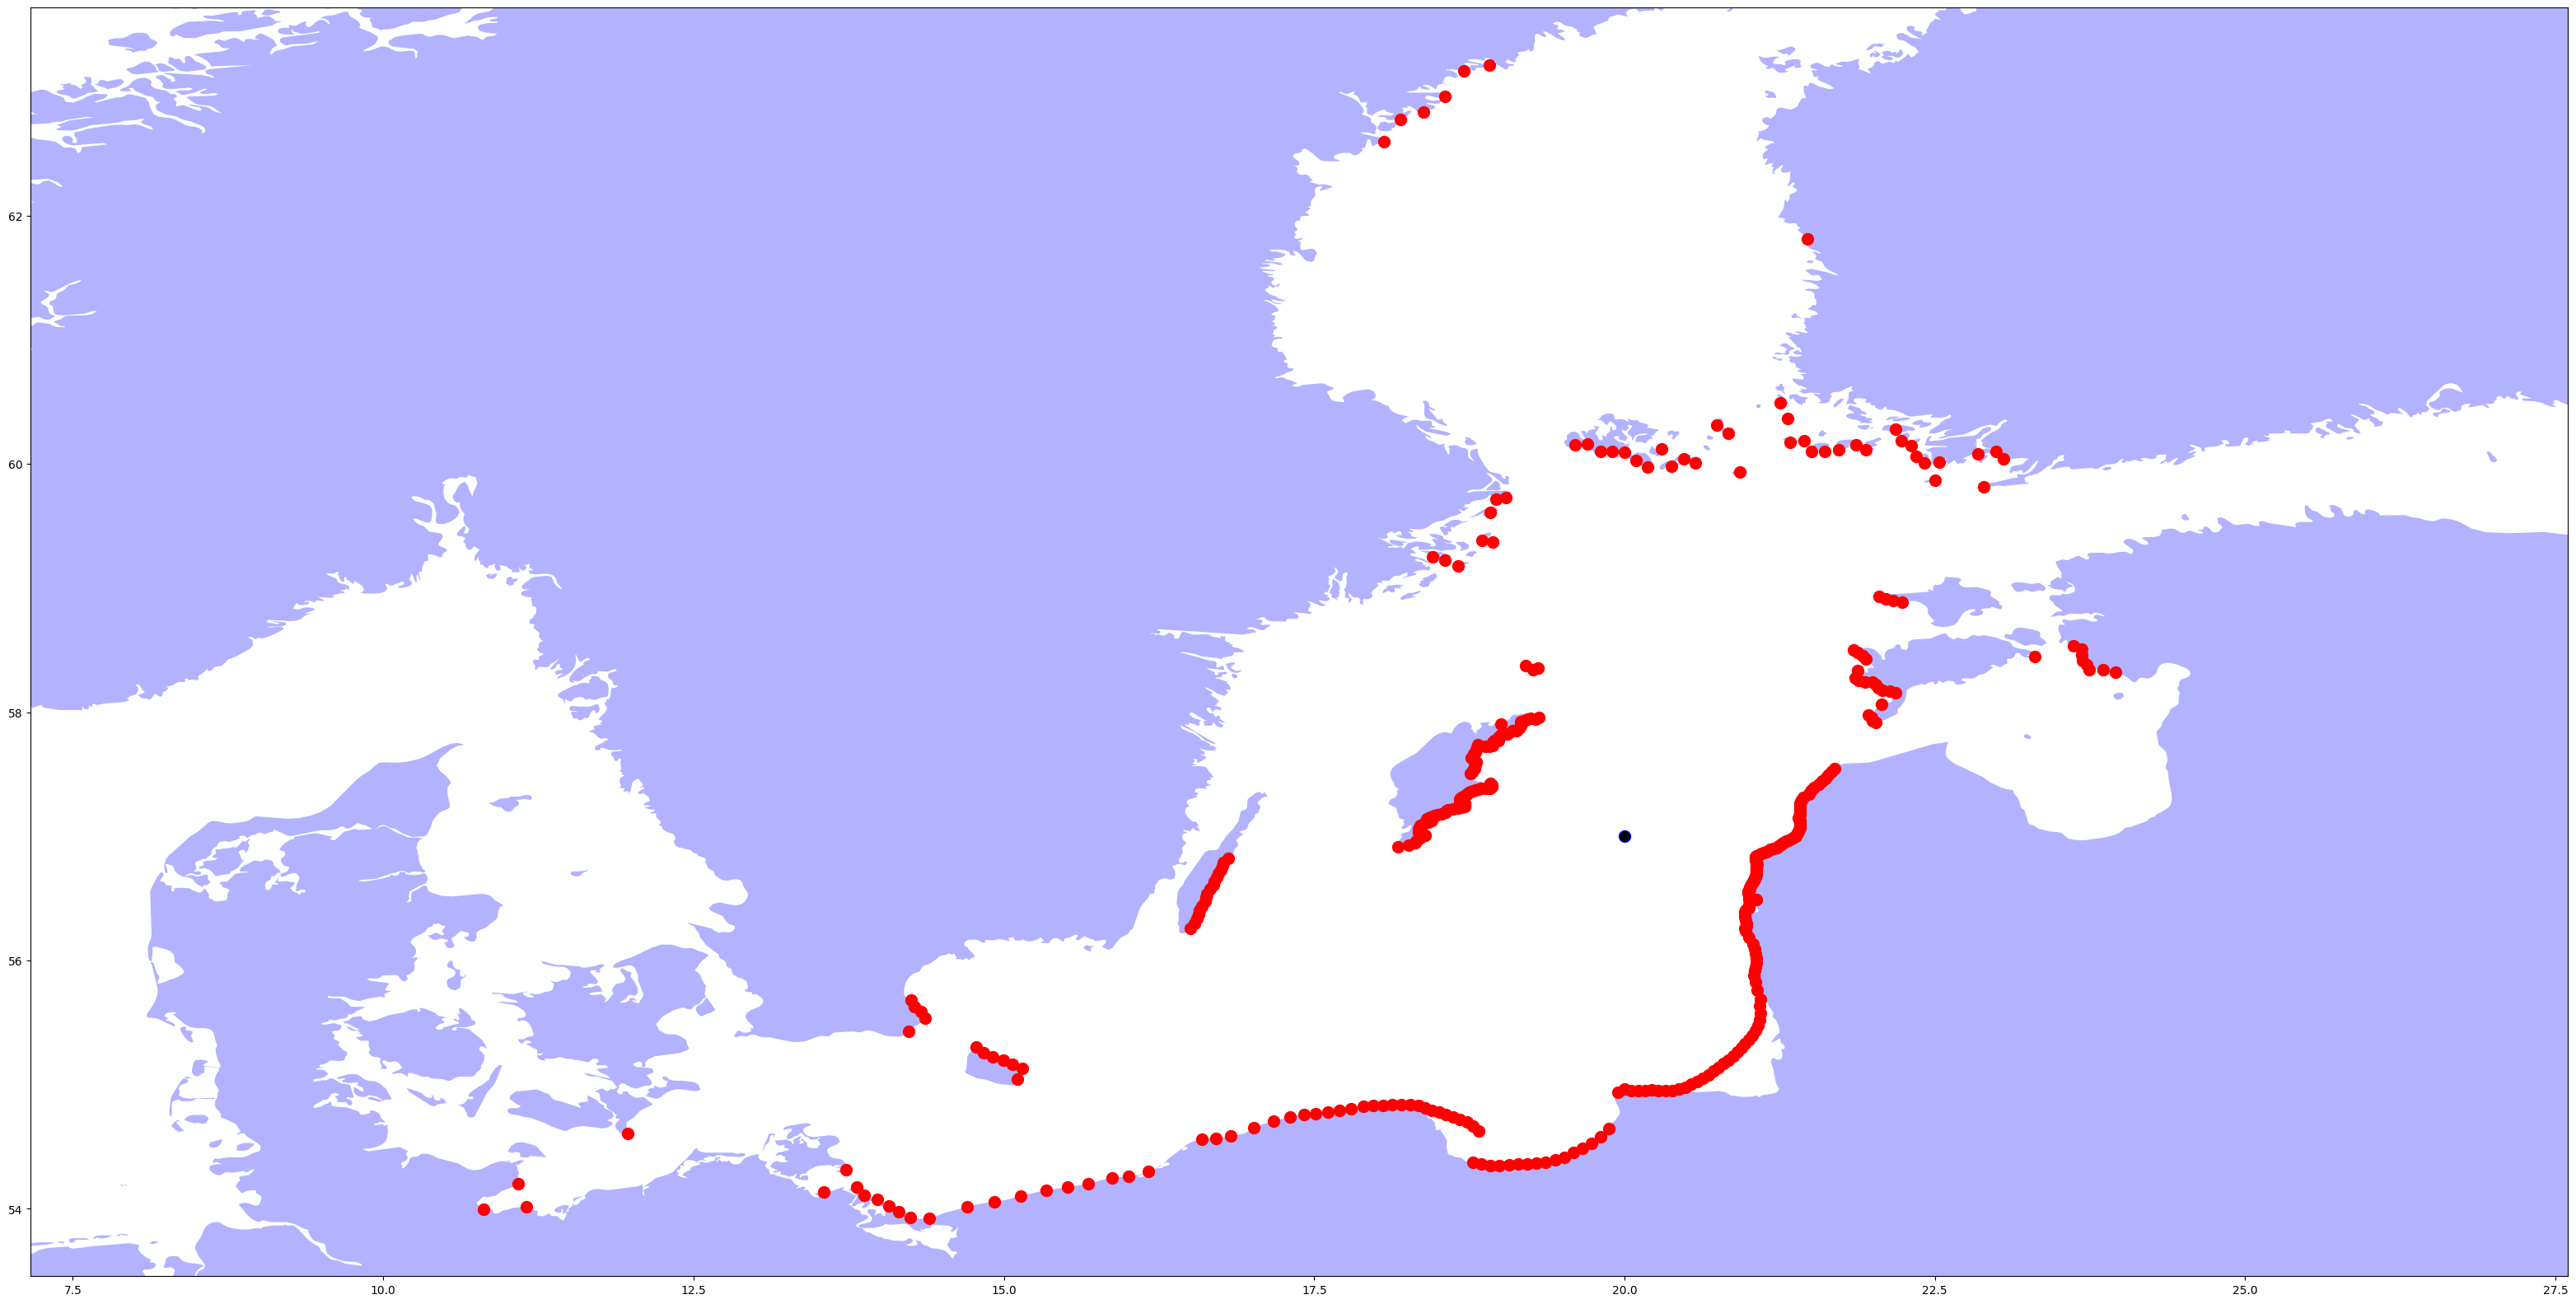

In [14]:
from importlib import reload
import geopandas_functions
reload(geopandas_functions)
get_all_intersections = geopandas_functions.get_all_intersections

point = (20, 57)
long, lat = point
# intersections = get_all_intersections_dynamic(lat, long, map_obj, max_distance=0.1, max_iterations=1)
intersections = get_all_intersections(lat, long, map_obj, num_circles=200)
unwrapped = unwrap_intersection(intersections, long)
xlim, ylim = create_silhouette_plot(unwrapped)
plot_with_map(map_obj, lat, long, unwrapped, xlim, ylim)

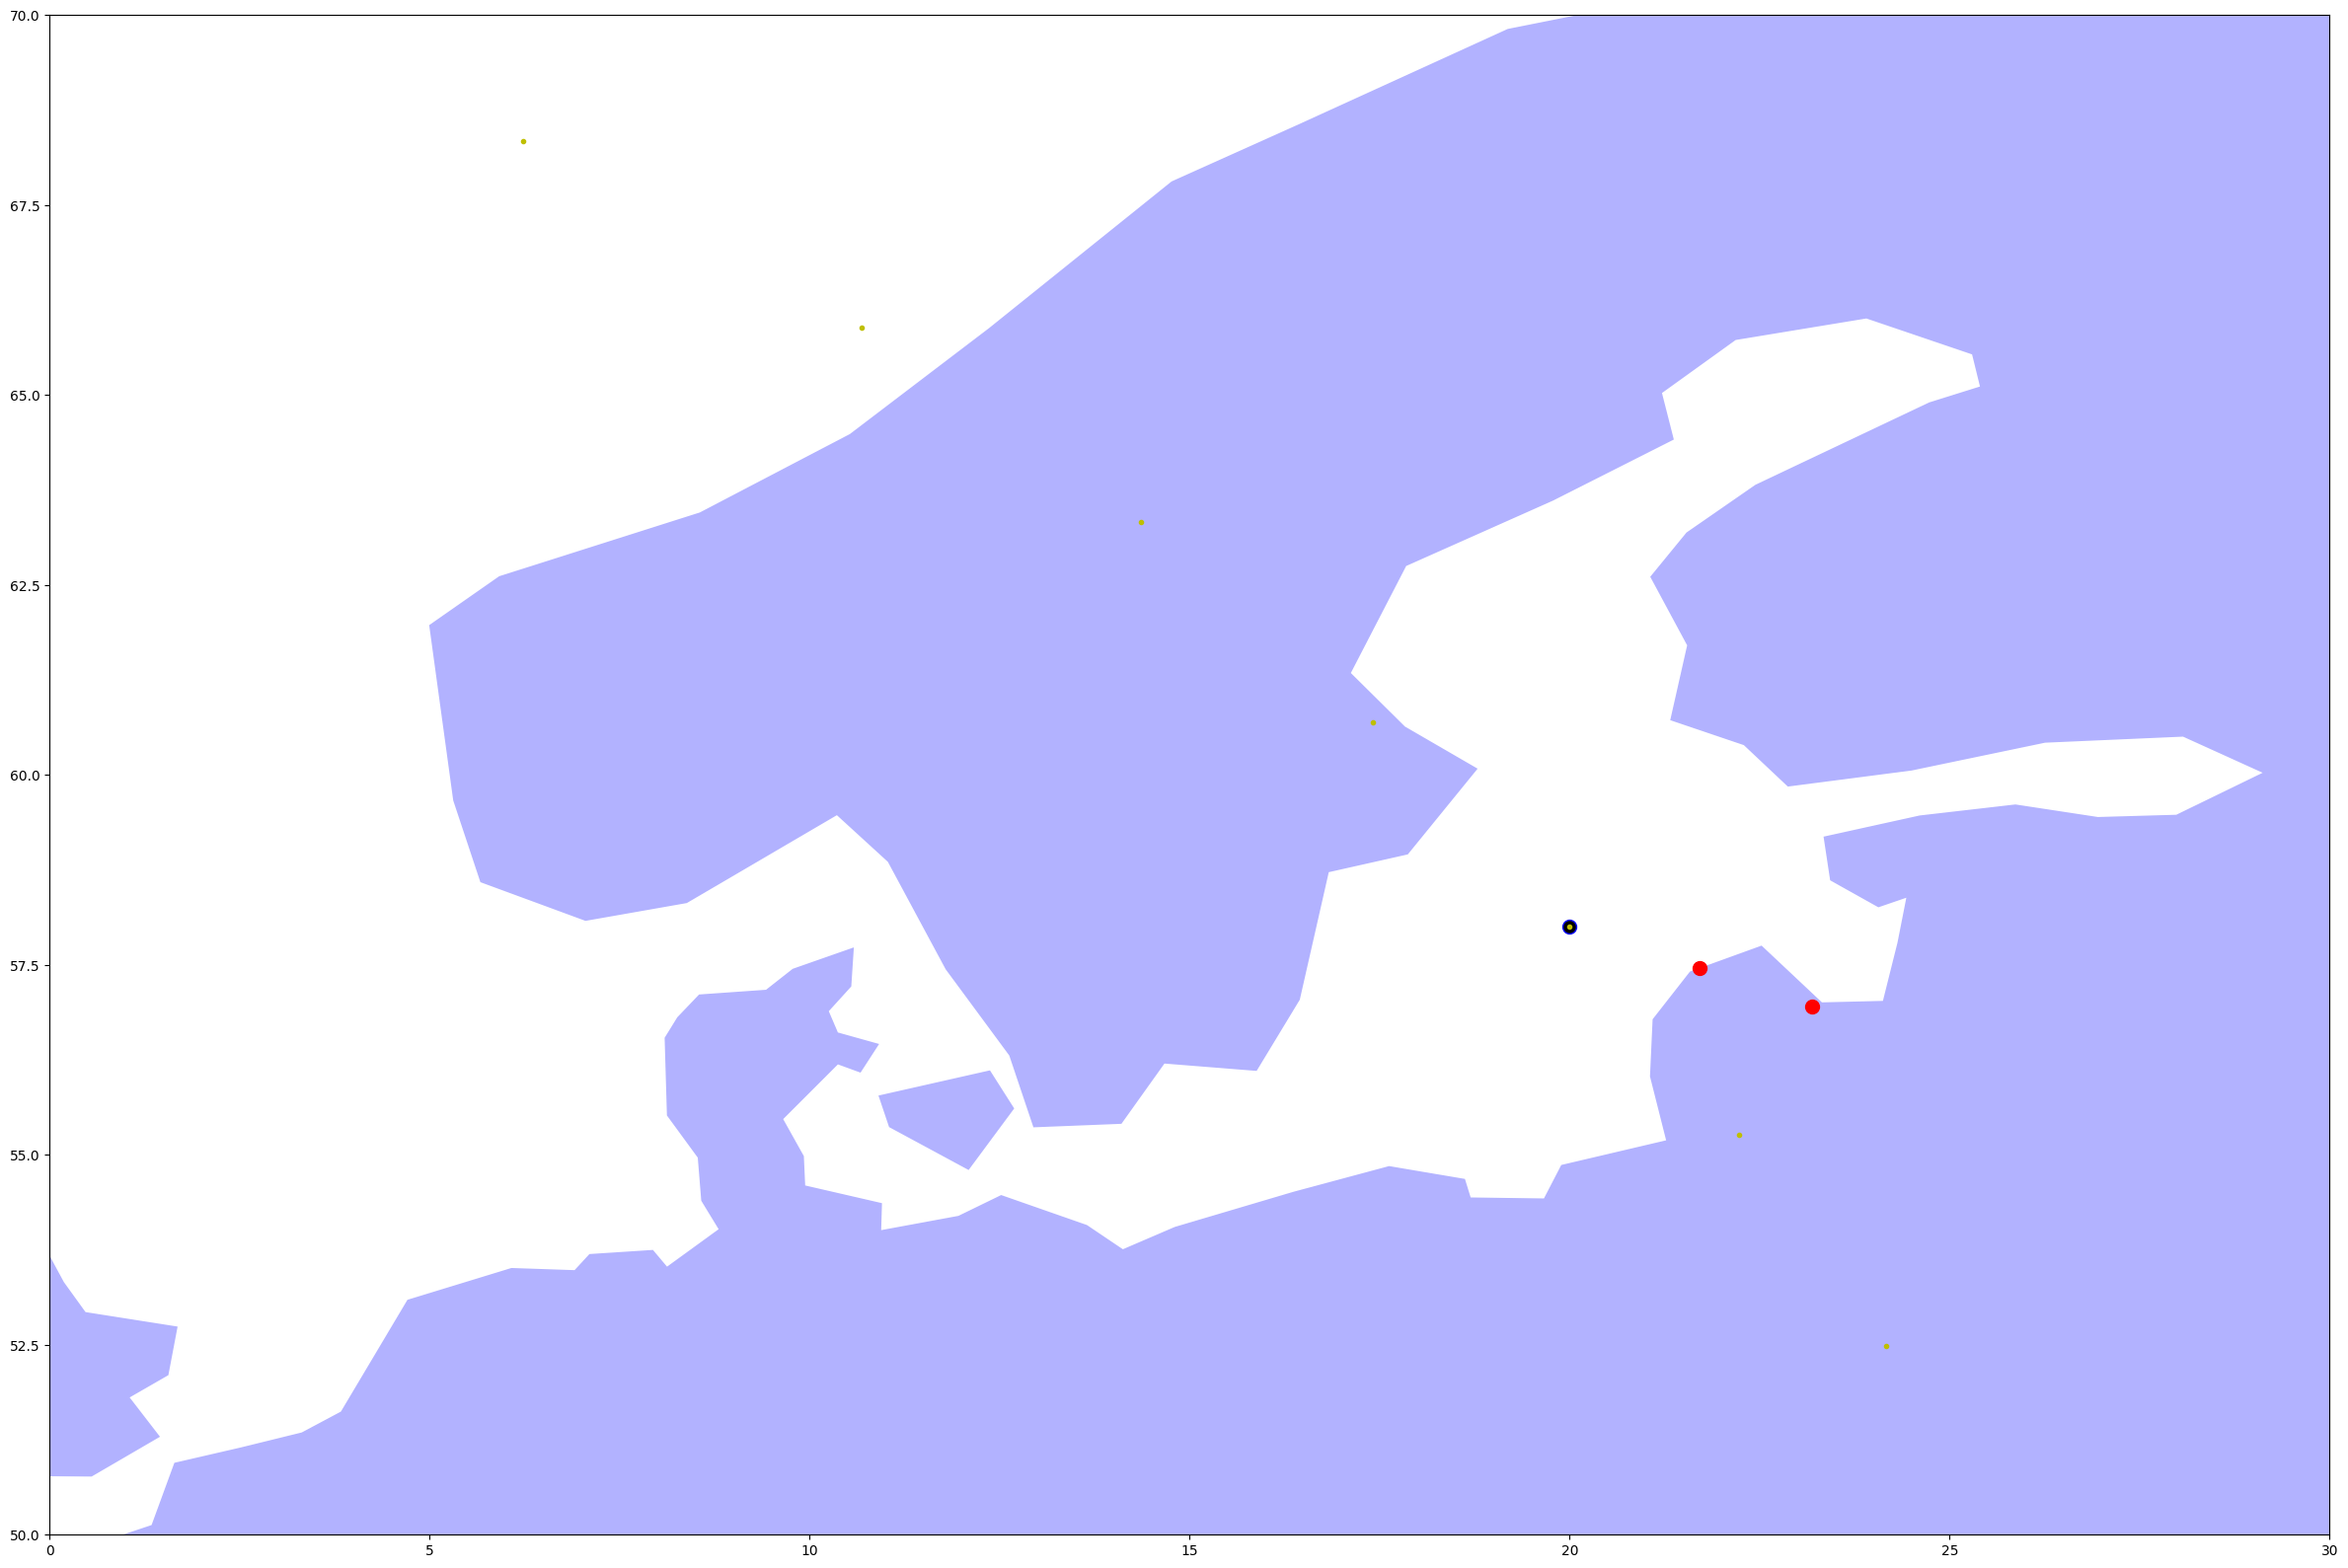

In [38]:
reload(geopandas_functions)
get_vertical_circle = geopandas_functions.get_vertical_circle

plot_with_map(map_obj, lat, long, inters, xlim=(0, 30), ylim=(50, 70))
circle = get_great_circle(lat, long, 25)
plt.gca().plot(circle[1], circle[0], 'y.')

In [7]:
from importlib import reload
import geopandas_functions
reload(geopandas_functions)
save_all_plots = geopandas_functions.save_all_plots

In [20]:
save_all_plots(intersections, map_obj, lat, long, dir)


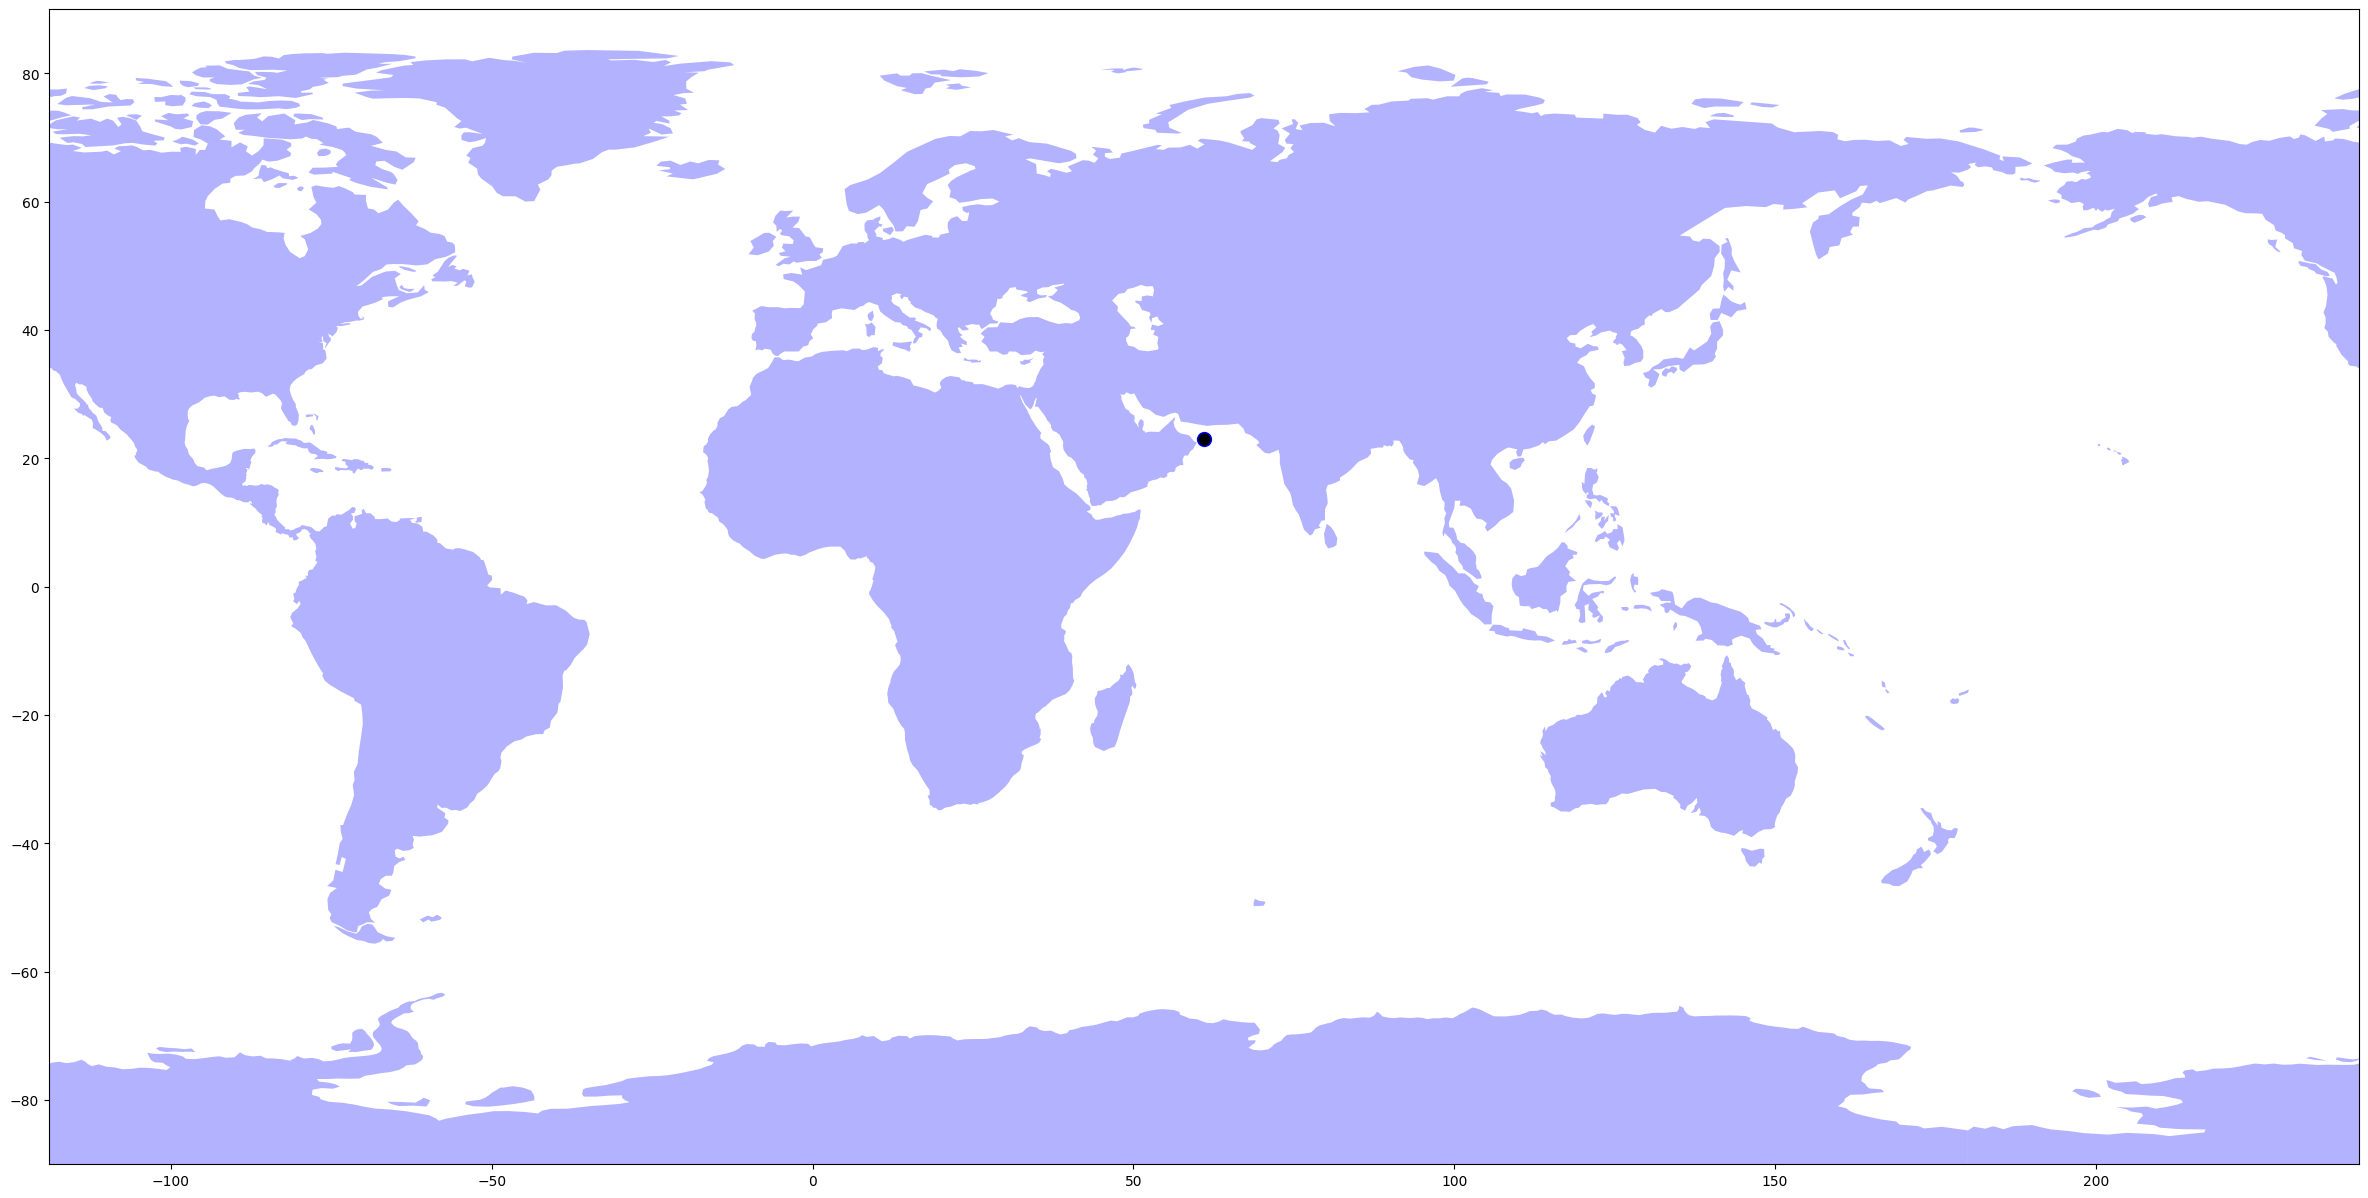

In [581]:
# Test new points
long = 61
lat = 23

plot_with_map(map_obj, lat, long, xlim=(long-180, long+180))

In [541]:
# plot_pipeline
latitude = 0
longitude = 0
if not point_in_ocean(latitude, longitude, map_obj):
    print('Point not in ocean')
    raise
intersections = get_all_intersections_dynamic(latitude, longitude, map_obj, max_distance=1, max_iterations=6)

/home/viktor/Documents/test/test/venv/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


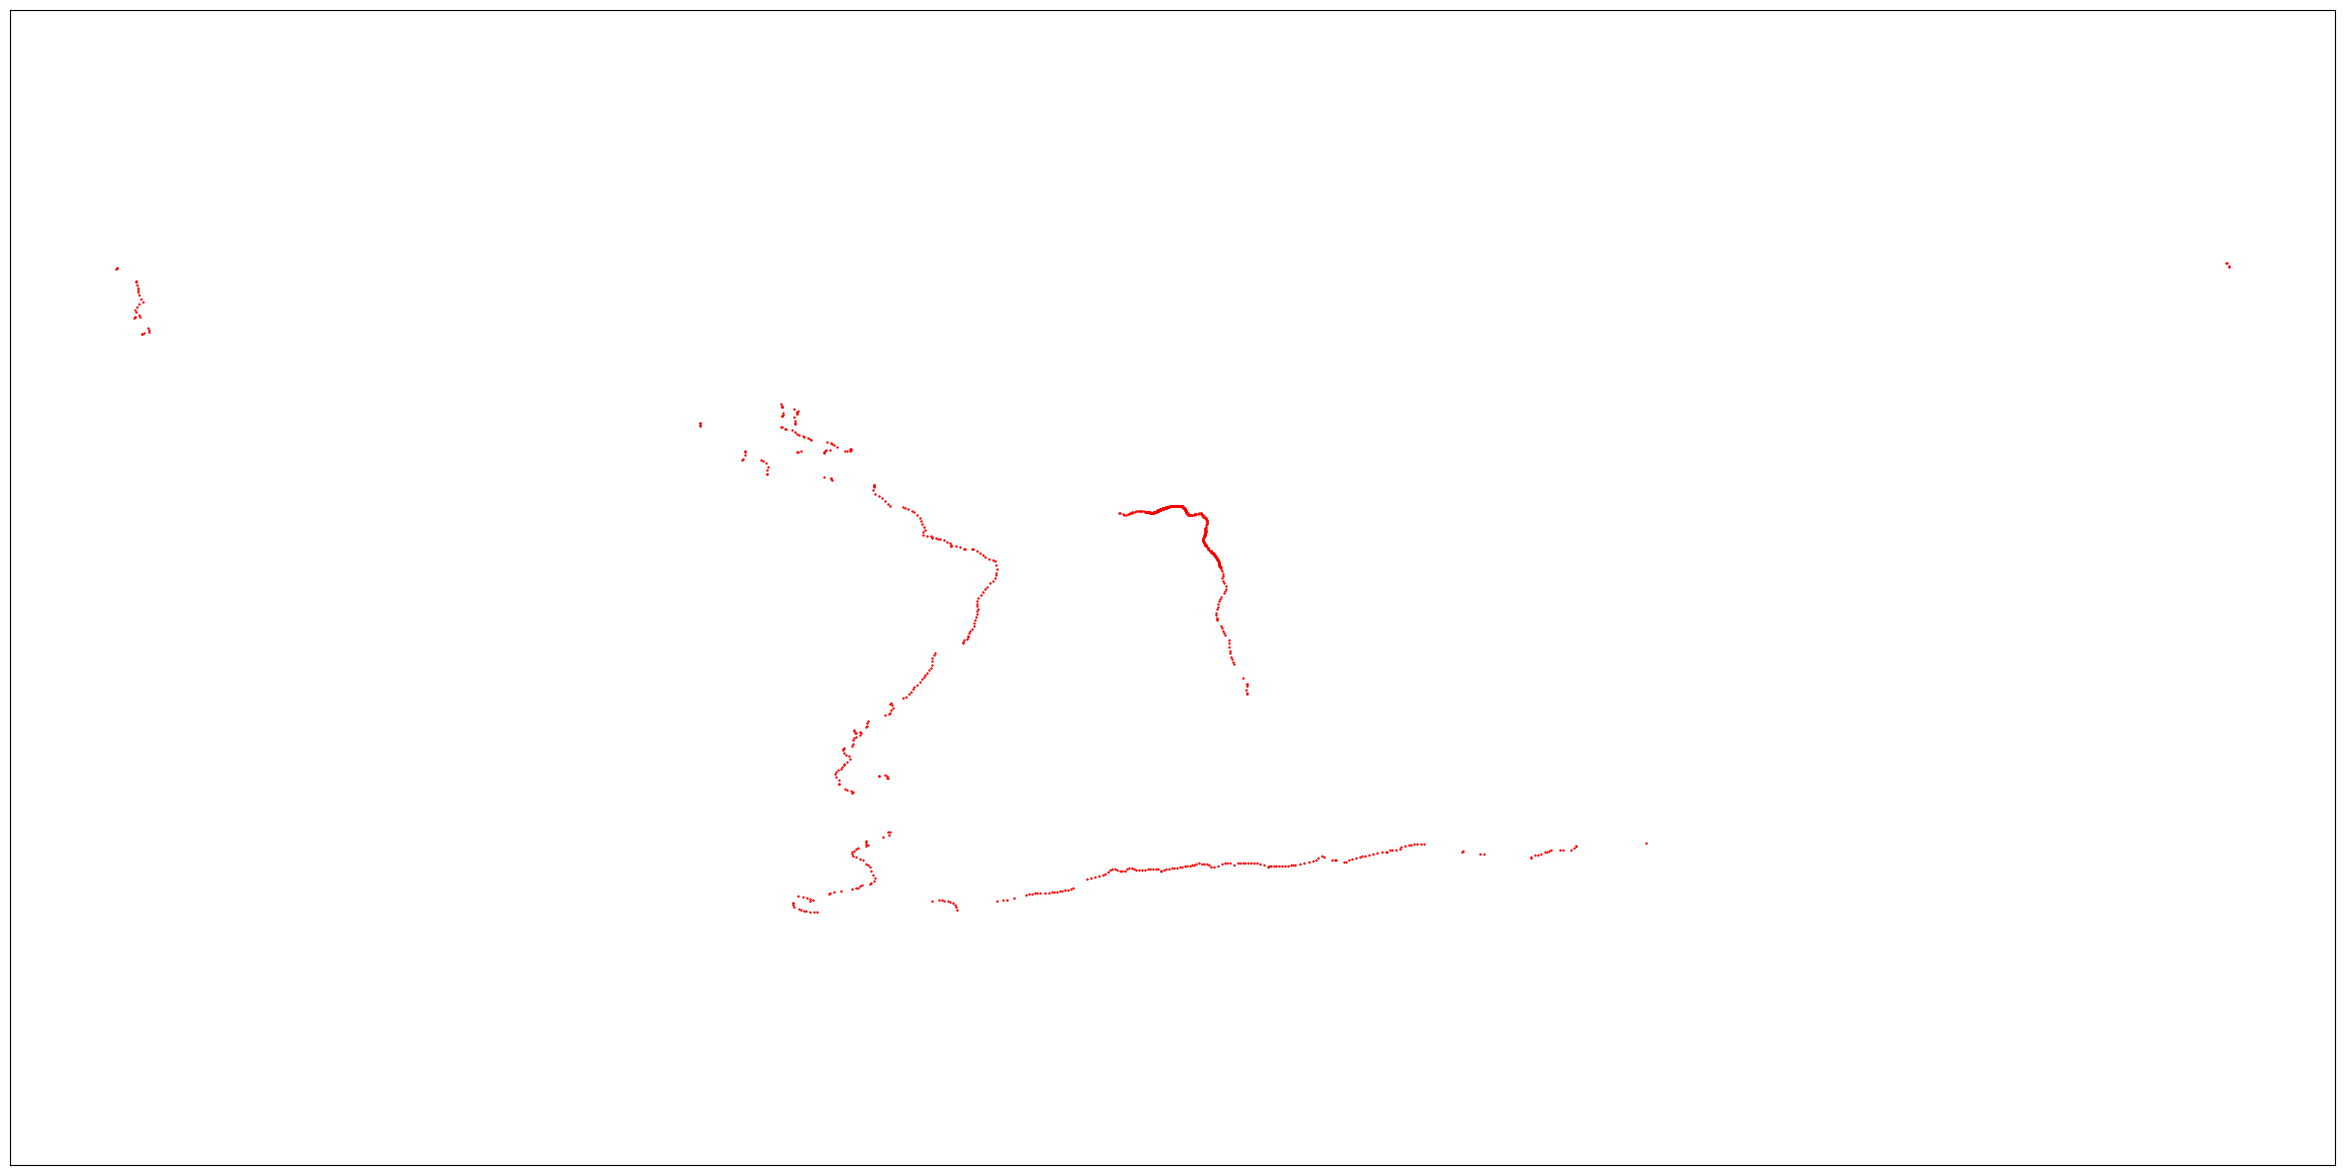

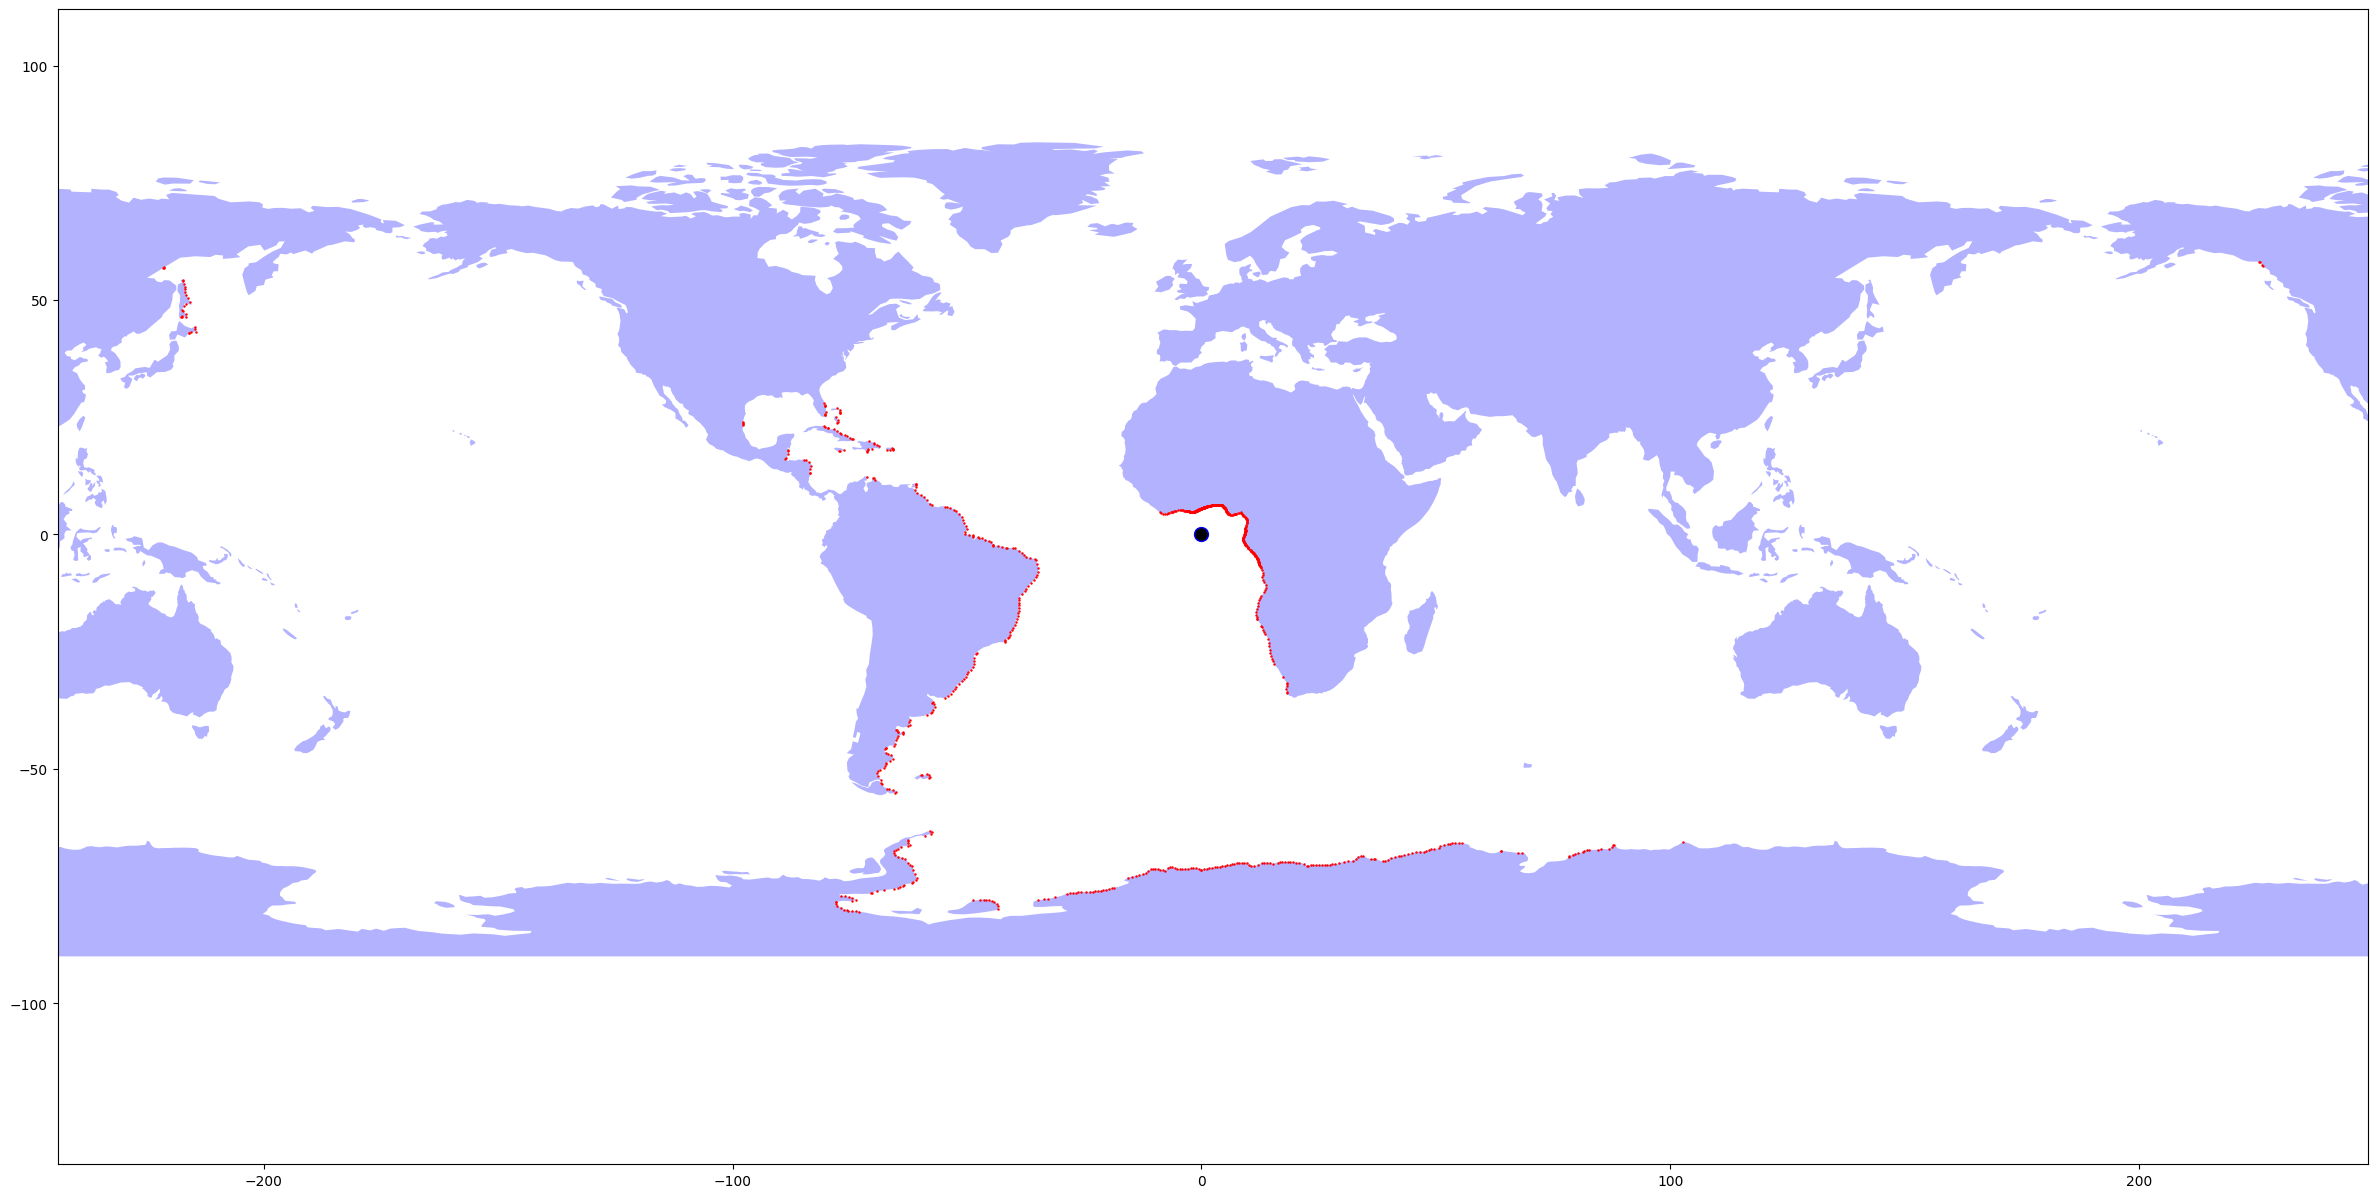

In [548]:
unwrapped = unwrap_intersection(intersections, longitude)
xlim, ylim = create_silhouette_plot(unwrapped)
plot_with_map(unwrapped, map_obj, latitude, longitude, xlim, ylim)

126.89263608779802


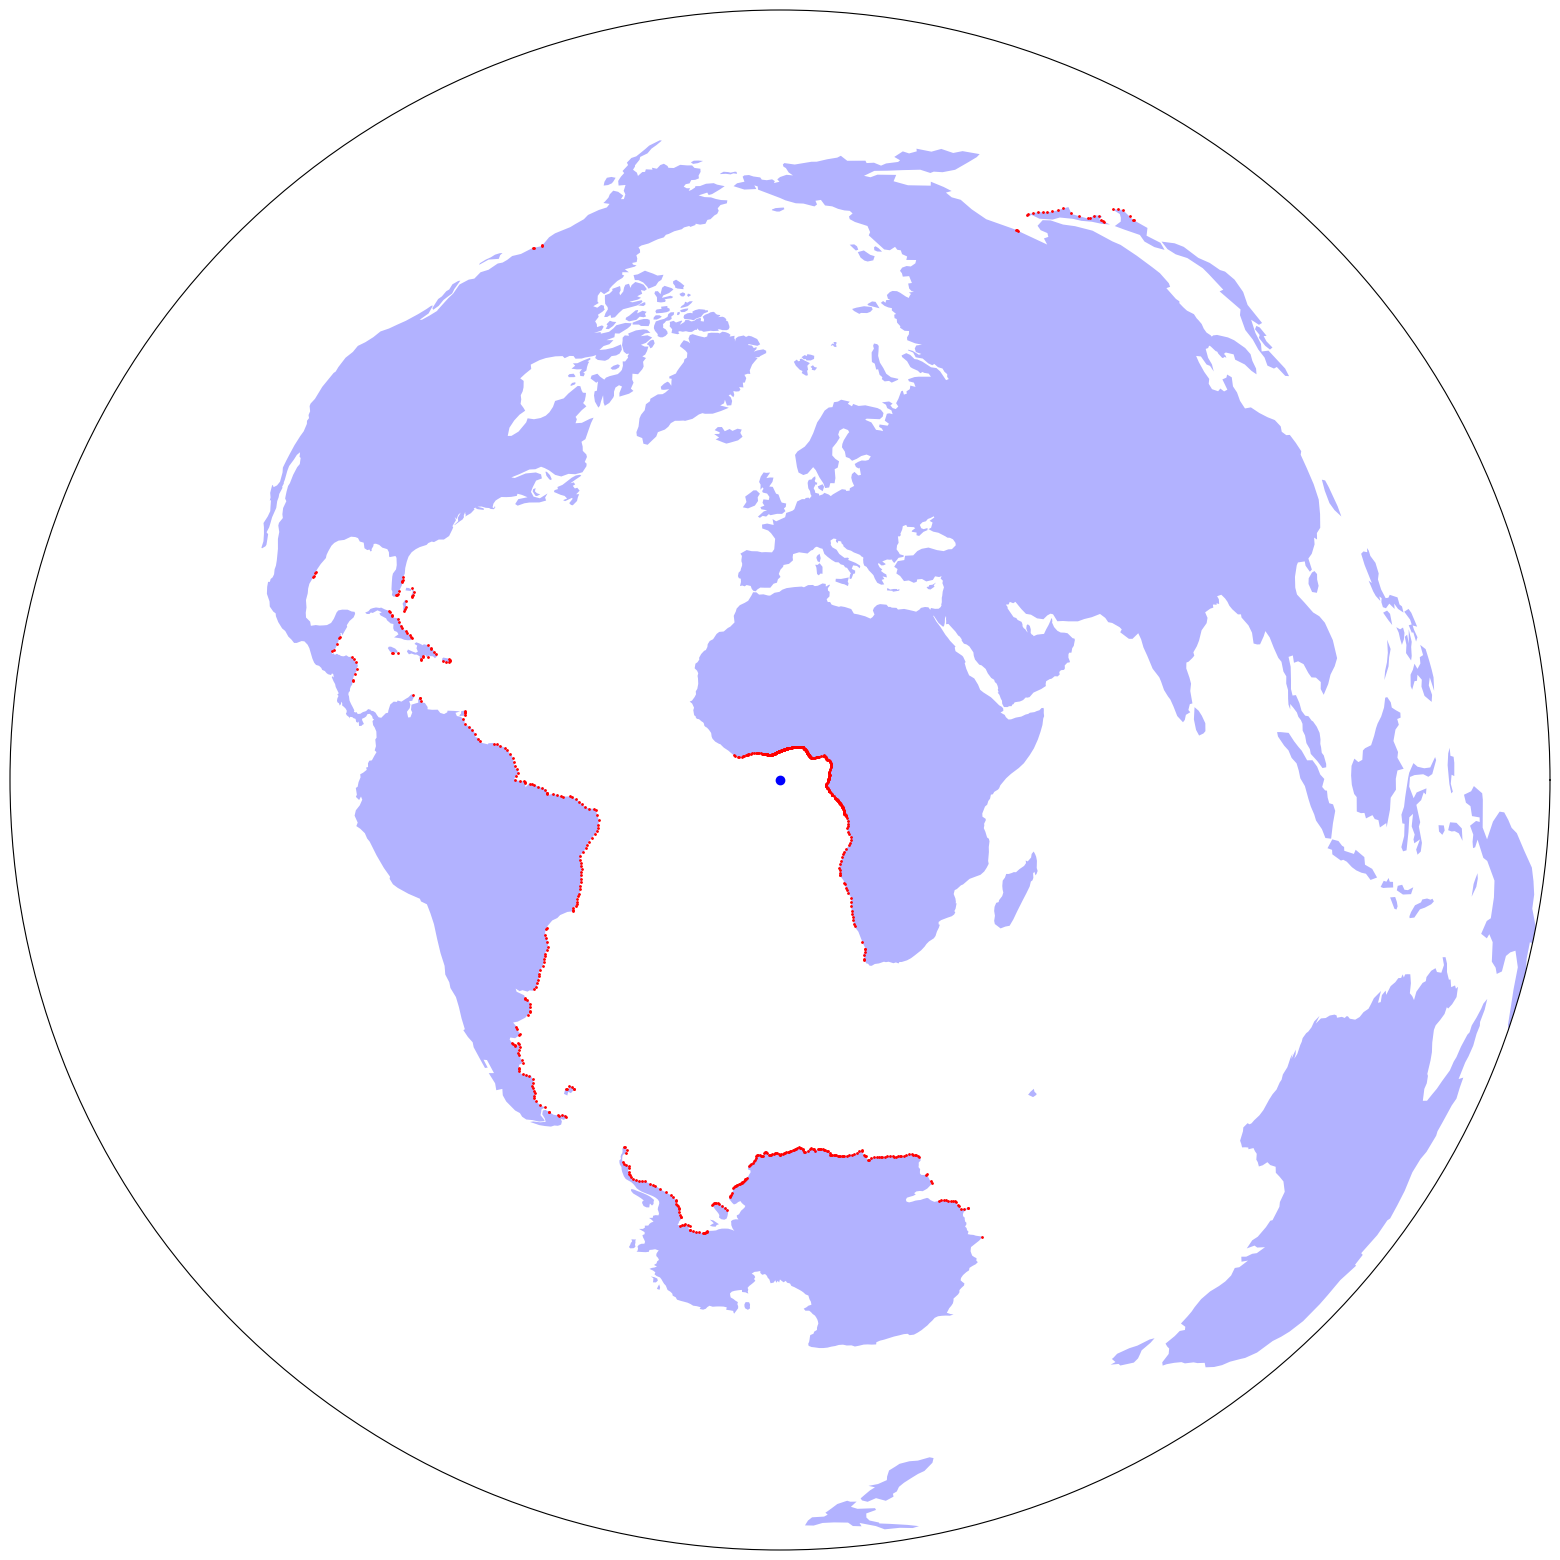

In [543]:
polar_inters = get_polar_points(intersections, latitude, longitude)
polar_map_coords = get_polar_map_coords(map_obj, latitude, longitude)

plot_polar_map(polar_map_coords, polar_inters)

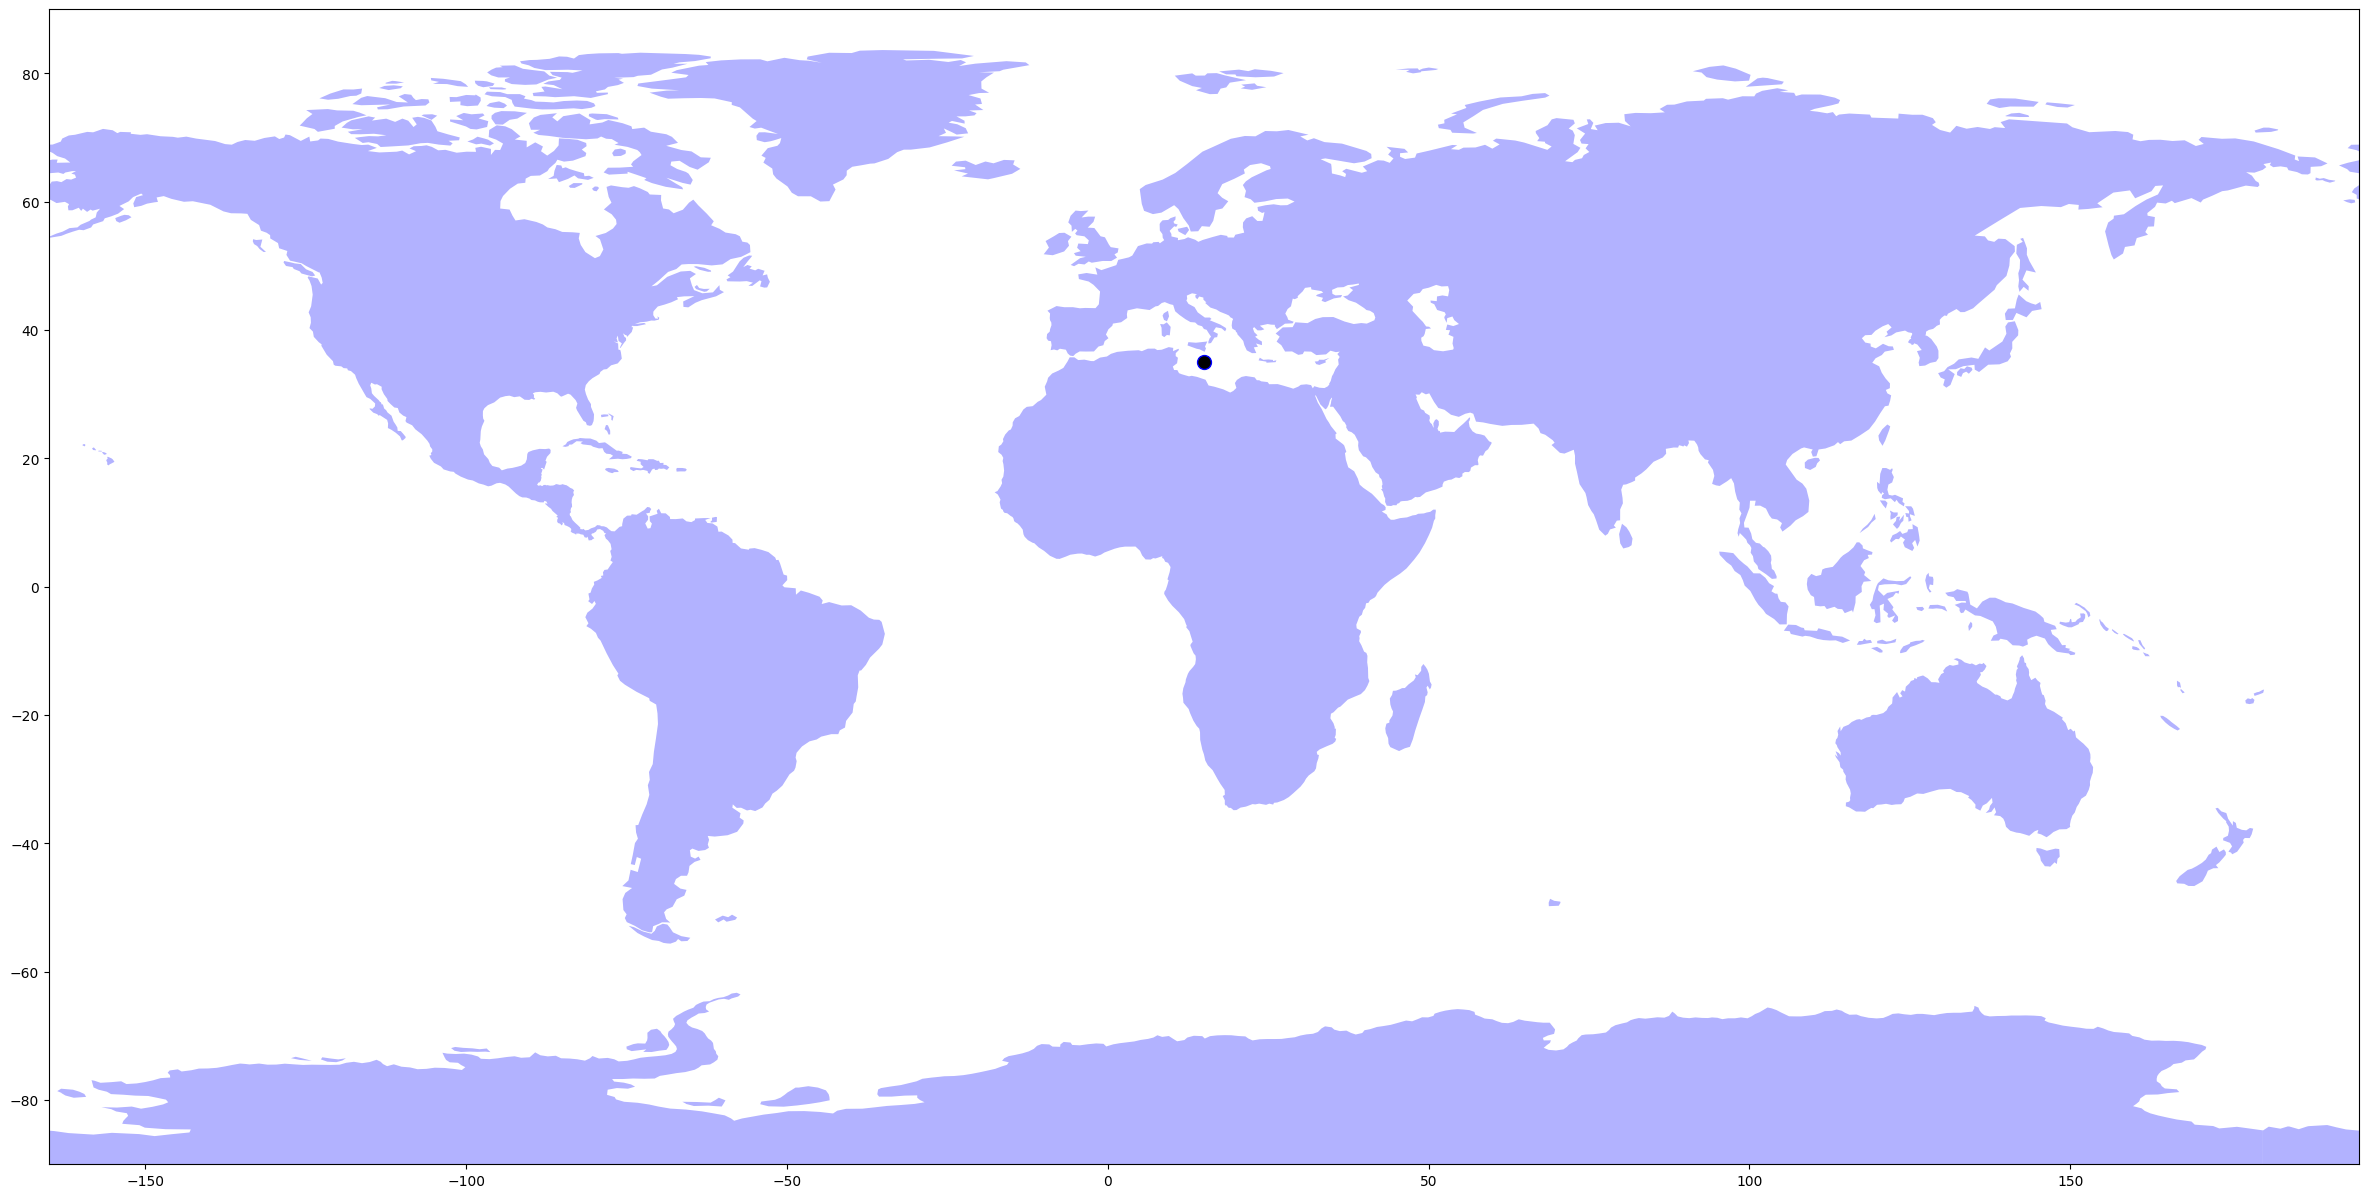

<Axes: >

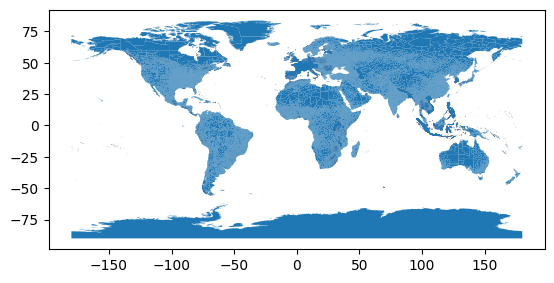

In [11]:
new_df.plot()